# Assignment :- Advanced Regression

### The solution is divided into the following sections:

    Step 1 : Data understanding and exploration
    Step 2 : Data cleaning
    Step 3 : Data preparation i.e. EDA
    Step 4 : Model building and evaluation


In [908]:
import os
import sys
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [909]:
# Importing the required libraries
import pandas as pd
import numpy as np
#to draw graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [910]:
#import libraries needed to build up the model
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## Step 1. Data Understanding and Exploration

a.Reading the data

b. Check for the columns

c. Check for mean 

In [911]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('train.csv')

In [912]:
#check for non null values for each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [913]:
#check for no of rows and columns in the dataset
df.shape

(1460, 81)

In [914]:
df.head(5).transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [915]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [916]:
#check for null values
round(df.isnull().sum()/len(df.index),2).sort_values(ascending = False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

# Step 2: Data Cleaning
 a. Removing values with higher % of null values
 
 b. Converting the columns into correct form
 
 c. Replacing null values with  nan
 
 d. Drop columns that are highly skewewd
 
 e. Drop the unnecessary columns

#### a. Removing values with higher % of null values 

In [917]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [918]:
#Removing above columns
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'],axis = 1)

In [919]:
#checking the null values after drop
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.10]

Series([], dtype: float64)

####  b. Converting the columns into correct form 

In [920]:
#Converting the year columns i.e. ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'] to numeric for nanlysis
#finding the maximum values
year_built_max = df.YearBuilt.max()
year_remod_add_max = df.YearRemodAdd.max()
year_garage_blt_max = df.GarageYrBlt.max()
year_sold_max = df.YrSold.max()

In [921]:
#Replacing the values with numeric
df['year_built_old'] = year_built_max - df.YearBuilt
df['year_remod_add_old'] = year_remod_add_max - df.YearRemodAdd
df['year_garage_blt_old'] = year_garage_blt_max - df.GarageYrBlt
df['year_sold_old'] = year_sold_max - df.YrSold

In [922]:
#drop the columns ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'] 
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'] , axis = 1)

In [923]:
df.shape

(1460, 75)

In [924]:
df.head(5).transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl


#### C. Imputing missing values

In [925]:
#checking rest null values
round(df.isnull().sum()/len(df.index),2).sort_values(ascending = False).head(20)

GarageFinish           0.06
year_garage_blt_old    0.06
GarageType             0.06
GarageQual             0.06
GarageCond             0.06
BsmtFinType2           0.03
BsmtFinType1           0.03
BsmtExposure           0.03
BsmtCond               0.03
BsmtQual               0.03
MasVnrArea             0.01
MasVnrType             0.01
Exterior2nd            0.00
RoofMatl               0.00
Exterior1st            0.00
Foundation             0.00
ExterQual              0.00
ExterCond              0.00
BsmtFinSF1             0.00
BsmtFinSF2             0.00
dtype: float64

In [926]:
#Check for the columns with the bset fit value
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [927]:
df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [928]:
df['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [929]:
df['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [930]:
df['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [931]:
df['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [932]:
df['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [933]:
df['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [934]:
df['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [935]:
df['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [936]:
df['year_garage_blt_old'].describe()

count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: year_garage_blt_old, dtype: float64

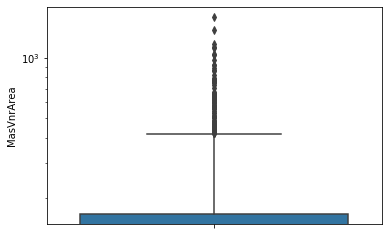

In [937]:
sns.boxplot(y=df['MasVnrArea'])
plt.yscale('log')

In [938]:
#replacing the null values numeric with mean and non numeric with best values
df.MasVnrType.fillna('None',inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)
df.year_garage_blt_old.fillna(-1,inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)

#### d.Check for skewness and drop columns that are more skewed 

In [939]:
#check column for numerical skewness
df.skew(axis = 0, skipna = True).sort_values(ascending = False)

MiscVal                24.476794
PoolArea               14.828374
LotArea                12.207688
3SsnPorch              10.304342
LowQualFinSF            9.011341
KitchenAbvGr            4.488397
BsmtFinSF2              4.255261
ScreenPorch             4.122214
BsmtHalfBath            4.103403
EnclosedPorch           3.089872
MasVnrArea              2.676412
OpenPorchSF             2.364342
SalePrice               1.882876
BsmtFinSF1              1.685503
WoodDeckSF              1.541376
TotalBsmtSF             1.524255
MSSubClass              1.407657
1stFlrSF                1.376757
GrLivArea               1.366560
BsmtUnfSF               0.920268
2ndFlrSF                0.813030
OverallCond             0.693067
year_garage_blt_old     0.677848
TotRmsAbvGrd            0.676341
HalfBath                0.675897
Fireplaces              0.649565
year_built_old          0.613461
BsmtFullBath            0.596067
year_remod_add_old      0.503562
OverallQual             0.216944
MoSold    

In [940]:
#check for categorical columns
df.describe(exclude=np.number).transpose().sort_values(ascending = False,by = 'freq')

,count,unique,top,freq
Utilities,1460,2,AllPub,1459
Street,1460,2,Pave,1454
Condition2,1460,8,Norm,1445
RoofMatl,1460,8,CompShg,1434
Heating,1460,6,GasA,1428
GarageCond,1460,5,TA,1407
GarageQual,1460,5,TA,1392
LandSlope,1460,3,Gtl,1382
CentralAir,1460,2,Y,1365
Functional,1460,7,Typ,1360


In [941]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [942]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [943]:
#from above we can conclude that utilities and Street are most skewd thus we will drop them
df = df.drop(['Street','Utilities'],axis = 1)

#### e. Dropping columns that are not used in analysis

In [944]:
#dropping id column from dataframe
df = df.drop('Id',axis = 1)

# Step 3 : Data Preparation i.e. Explratory Data Analysis
    a. Check the correlation between the variables

    b. Check for data distribution with hwlp of scatterplot and boxplot

    c. Check for normal distribution

    d. Creating dummies for categorical columns

In [945]:
#list of all numeric variables in the dataframe
num_list = ['MiscVal','PoolArea','LotArea','3SsnPorch','LowQualFinSF','KitchenAbvGr','BsmtFinSF2','ScreenPorch','BsmtHalfBath','EnclosedPorch','MasVnrArea','OpenPorchSF','BsmtFinSF1','WoodDeckSF','TotalBsmtSF','MSSubClass','1stFlrSF','GrLivArea','BsmtUnfSF','2ndFlrSF','OverallCond','year_garage_blt_old','TotRmsAbvGrd','HalfBath','Fireplaces','year_built_old','BsmtFullBath','year_remod_add_old','OverallQual','MoSold','BedroomAbvGr','GarageArea','FullBath','year_sold_old','GarageCars']
categorical_list = list(set(df.columns)-set(num_list))

In [946]:
#no of categorical columns
len(categorical_list)

37

#### a. Check for Correlation 

No handles with labels found to put in legend.


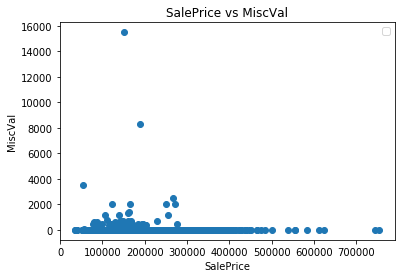

No handles with labels found to put in legend.


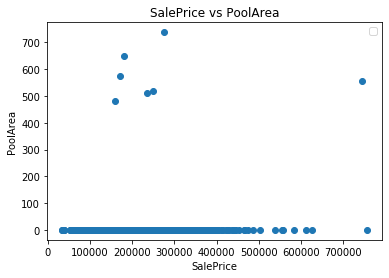

No handles with labels found to put in legend.


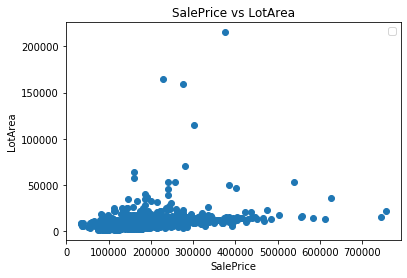

No handles with labels found to put in legend.


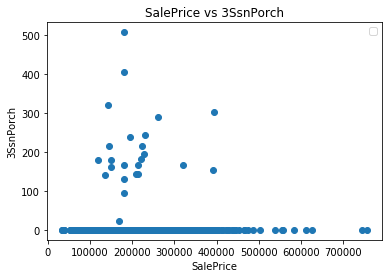

No handles with labels found to put in legend.


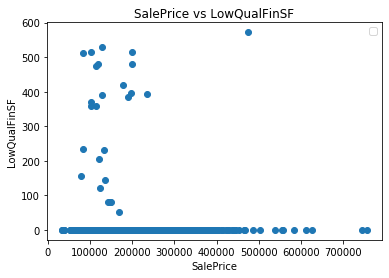

No handles with labels found to put in legend.


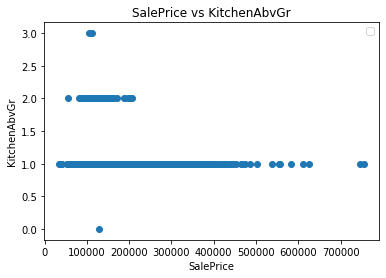

No handles with labels found to put in legend.


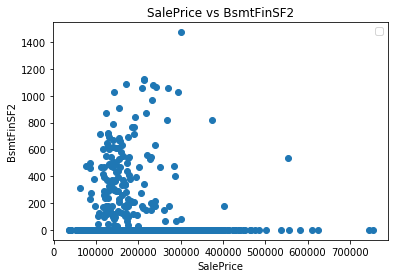

No handles with labels found to put in legend.


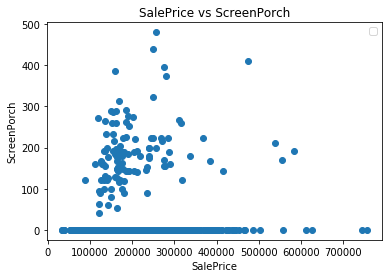

No handles with labels found to put in legend.


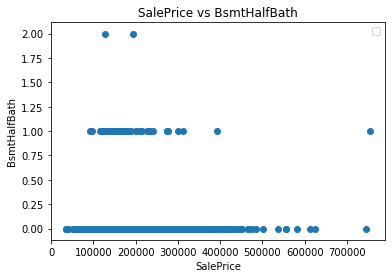

No handles with labels found to put in legend.


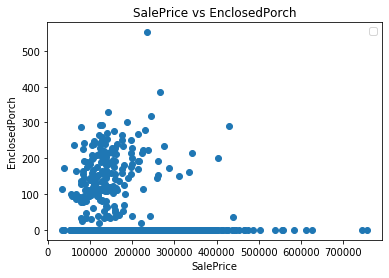

No handles with labels found to put in legend.


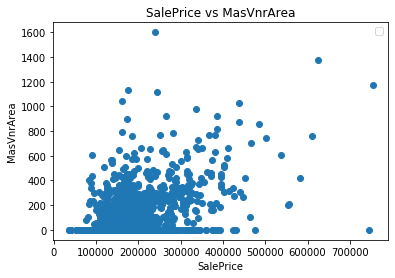

No handles with labels found to put in legend.


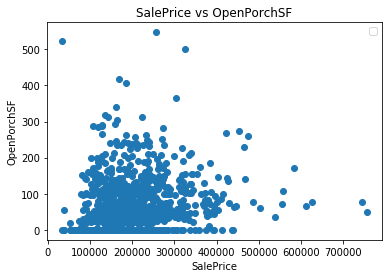

No handles with labels found to put in legend.


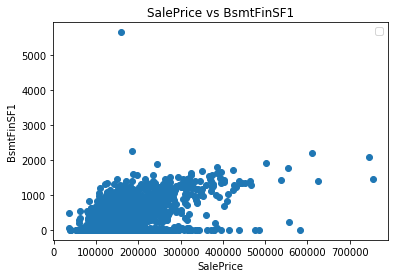

No handles with labels found to put in legend.


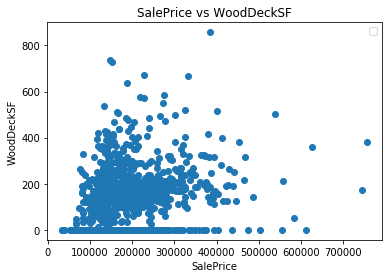

No handles with labels found to put in legend.


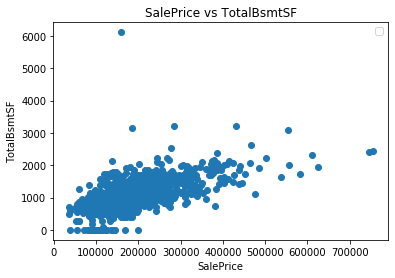

No handles with labels found to put in legend.


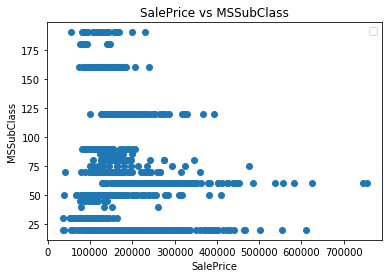

No handles with labels found to put in legend.


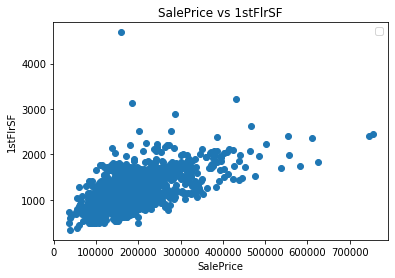

No handles with labels found to put in legend.


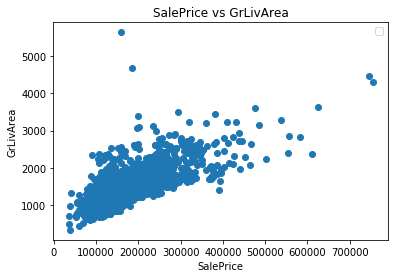

No handles with labels found to put in legend.


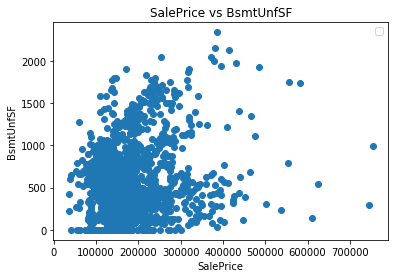

No handles with labels found to put in legend.


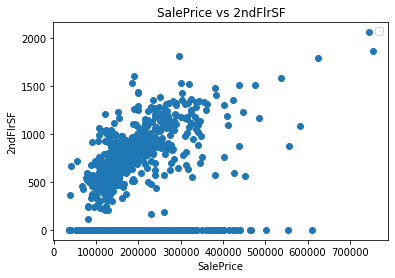

No handles with labels found to put in legend.


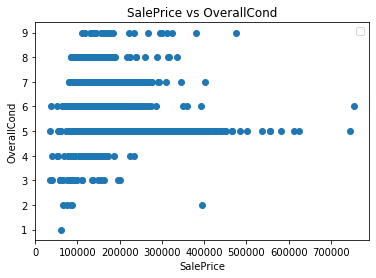

No handles with labels found to put in legend.


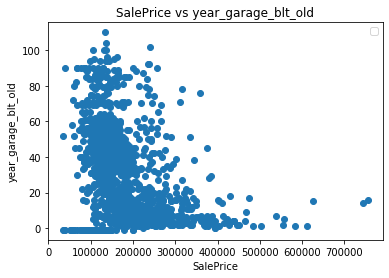

No handles with labels found to put in legend.


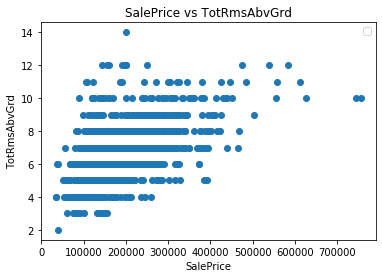

No handles with labels found to put in legend.


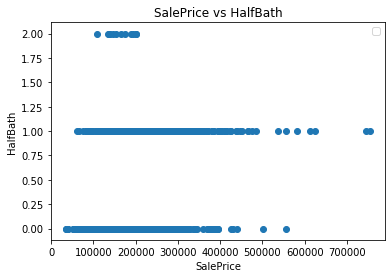

No handles with labels found to put in legend.


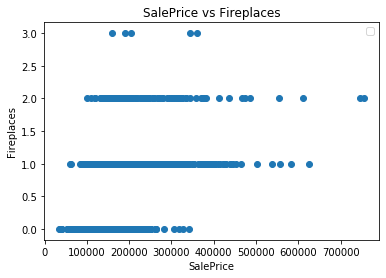

No handles with labels found to put in legend.


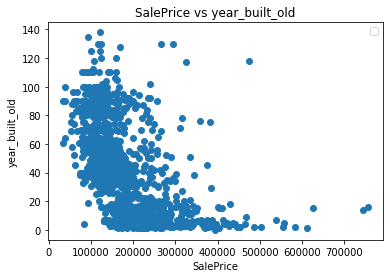

No handles with labels found to put in legend.


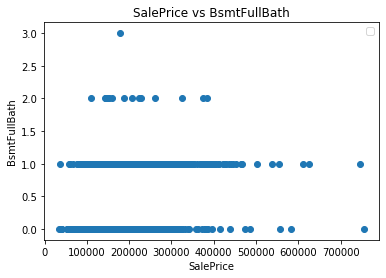

No handles with labels found to put in legend.


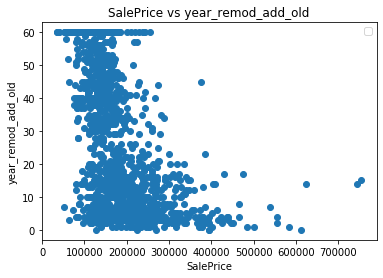

No handles with labels found to put in legend.


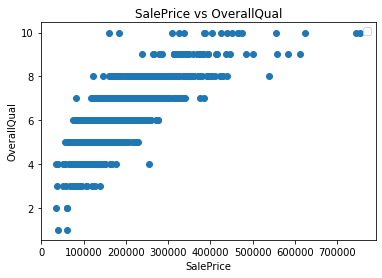

No handles with labels found to put in legend.


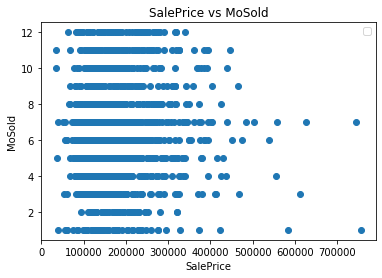

No handles with labels found to put in legend.


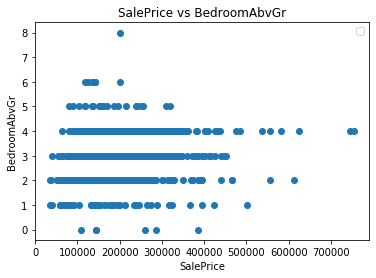

No handles with labels found to put in legend.


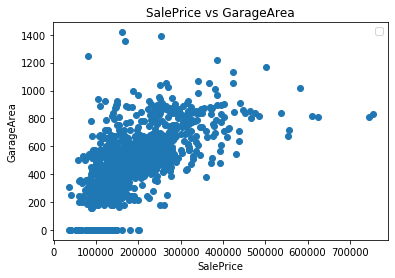

No handles with labels found to put in legend.


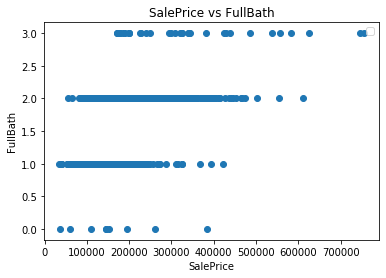

No handles with labels found to put in legend.


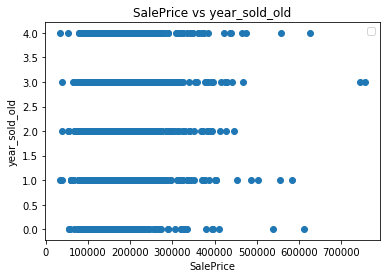

No handles with labels found to put in legend.


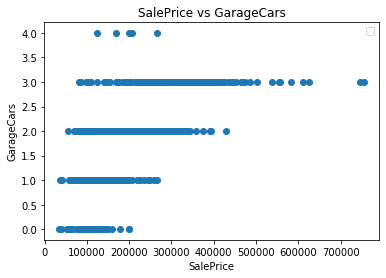

In [947]:
#for numerical variables
for y_col in num_list:

    figure = plt.figure()
    ax = plt.gca()
    ax.scatter(df['SalePrice'], df[y_col])
    ax.set_xlabel('SalePrice')
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format('SalePrice', y_col))

    plt.legend()
    plt.show()

No handles with labels found to put in legend.


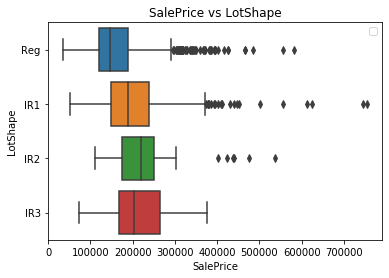

No handles with labels found to put in legend.


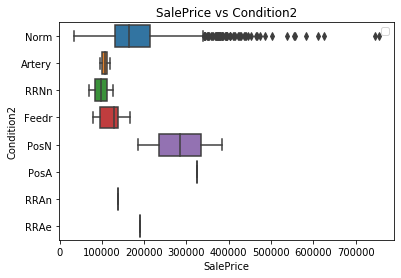

No handles with labels found to put in legend.


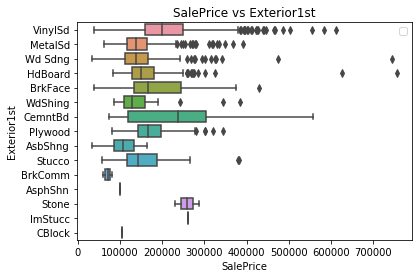

No handles with labels found to put in legend.


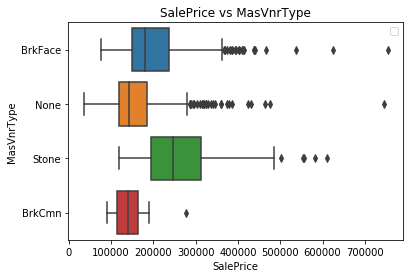

No handles with labels found to put in legend.


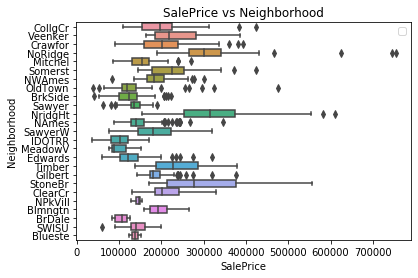

No handles with labels found to put in legend.


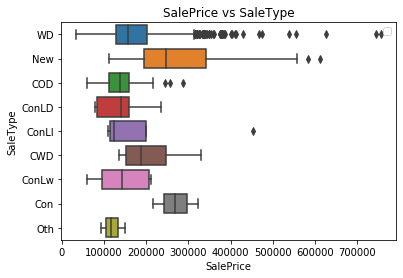

No handles with labels found to put in legend.


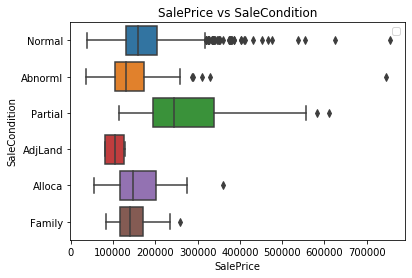

No handles with labels found to put in legend.


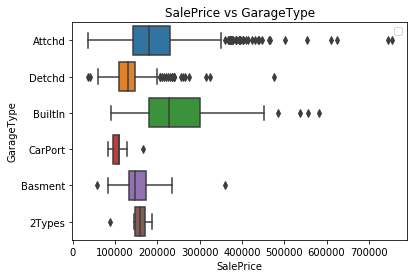

No handles with labels found to put in legend.


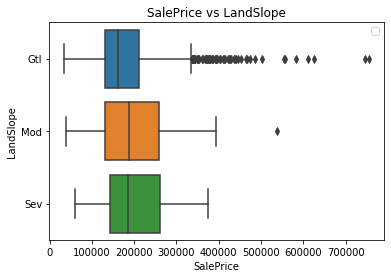

No handles with labels found to put in legend.


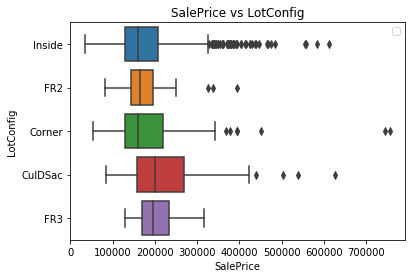

No handles with labels found to put in legend.


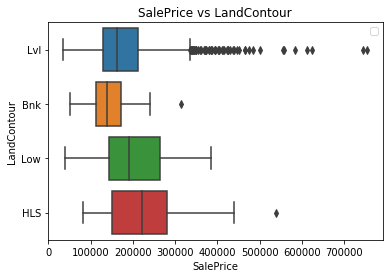

No handles with labels found to put in legend.


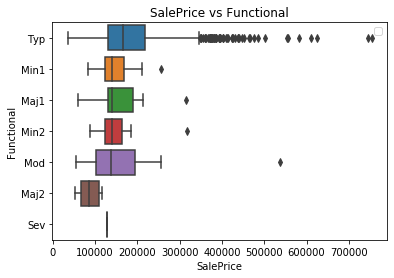

No handles with labels found to put in legend.


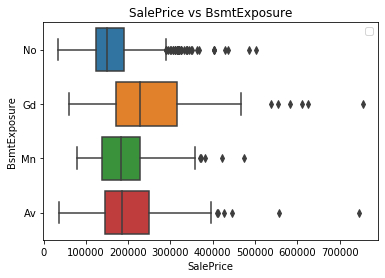

No handles with labels found to put in legend.


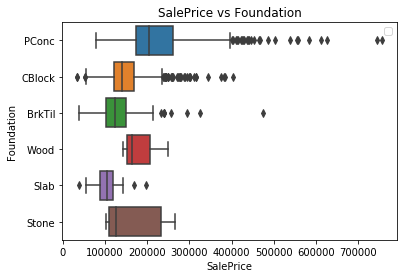

No handles with labels found to put in legend.


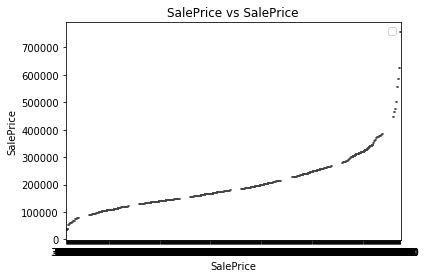

No handles with labels found to put in legend.


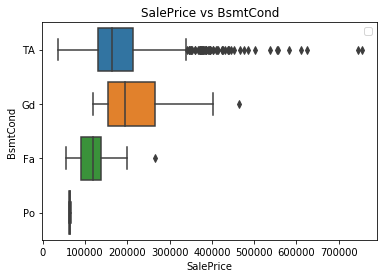

No handles with labels found to put in legend.


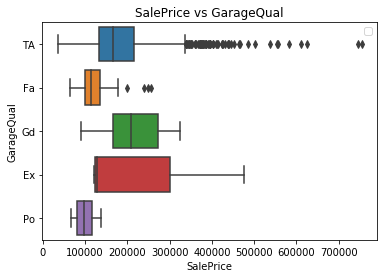

No handles with labels found to put in legend.


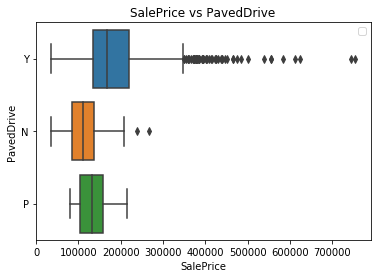

No handles with labels found to put in legend.


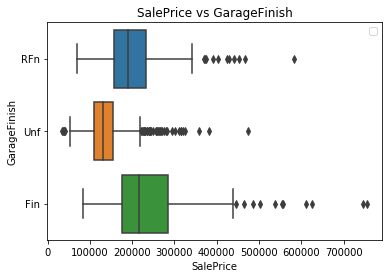

No handles with labels found to put in legend.


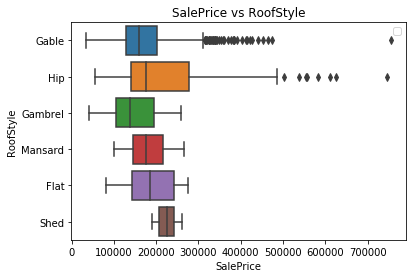

No handles with labels found to put in legend.


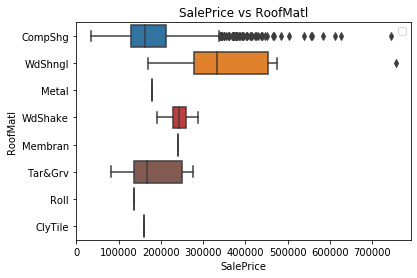

No handles with labels found to put in legend.


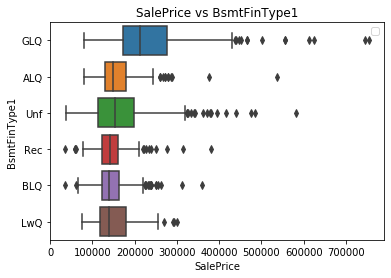

No handles with labels found to put in legend.


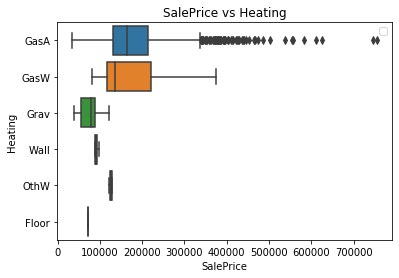

No handles with labels found to put in legend.


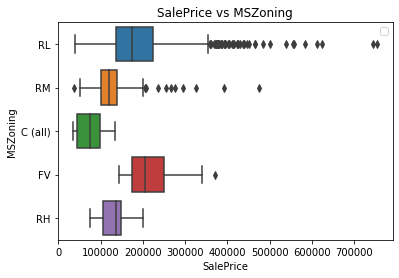

No handles with labels found to put in legend.


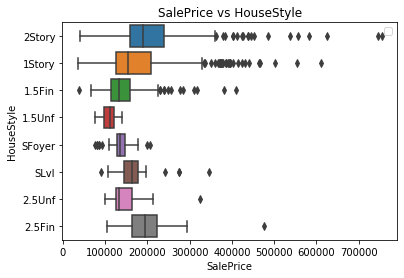

No handles with labels found to put in legend.


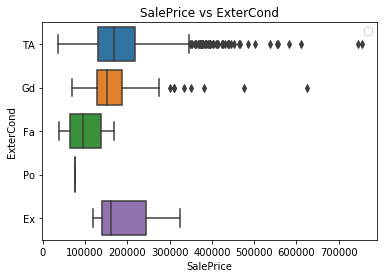

No handles with labels found to put in legend.


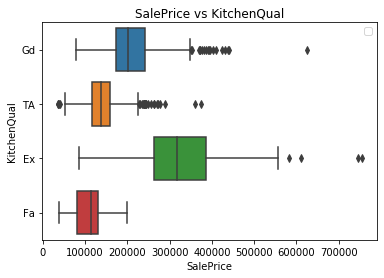

No handles with labels found to put in legend.


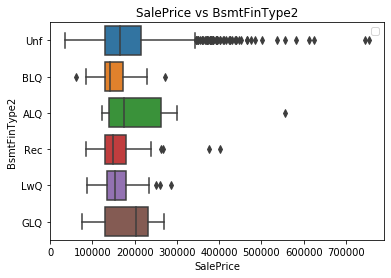

No handles with labels found to put in legend.


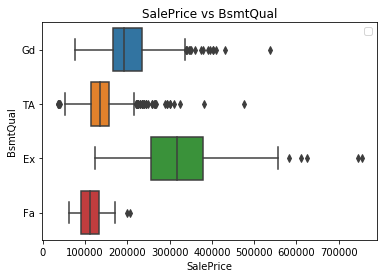

No handles with labels found to put in legend.


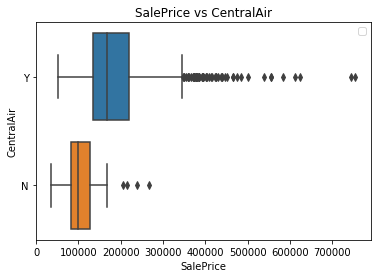

No handles with labels found to put in legend.


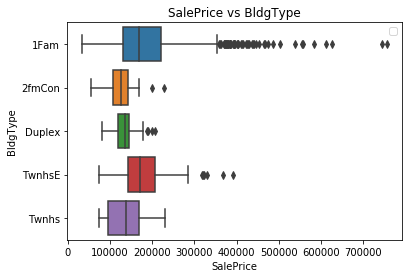

No handles with labels found to put in legend.


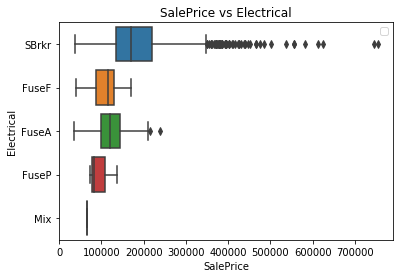

No handles with labels found to put in legend.


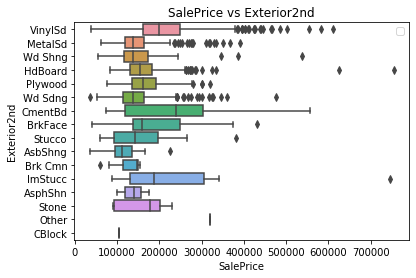

No handles with labels found to put in legend.


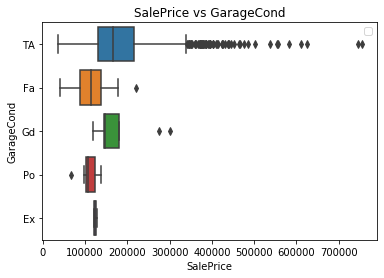

No handles with labels found to put in legend.


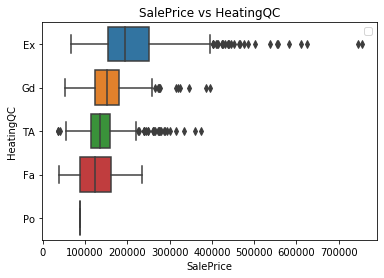

No handles with labels found to put in legend.


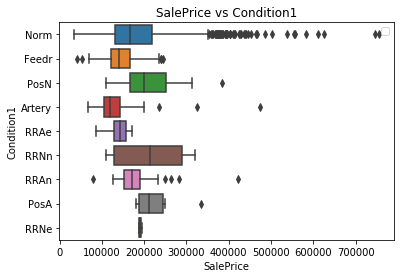

No handles with labels found to put in legend.


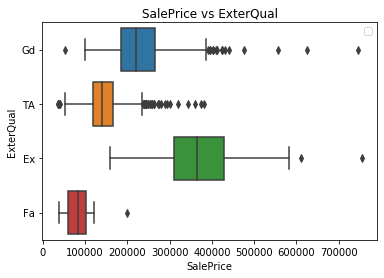

In [948]:
#for categorical variables

for y_col in categorical_list:

    figure = plt.figure()
    sns.boxplot(x ='SalePrice',y = y_col , data = df)
    plt.xlabel('SalePrice')
    plt.ylabel(y_col)
    plt.title("{} vs {}".format('SalePrice', y_col))

    plt.legend()
    plt.show()

#### From above graph we can see that we have many categorical columns labelled as numerical for eg {'3SsnPorch','LowQualFinSF','KitchenAbvGr'}

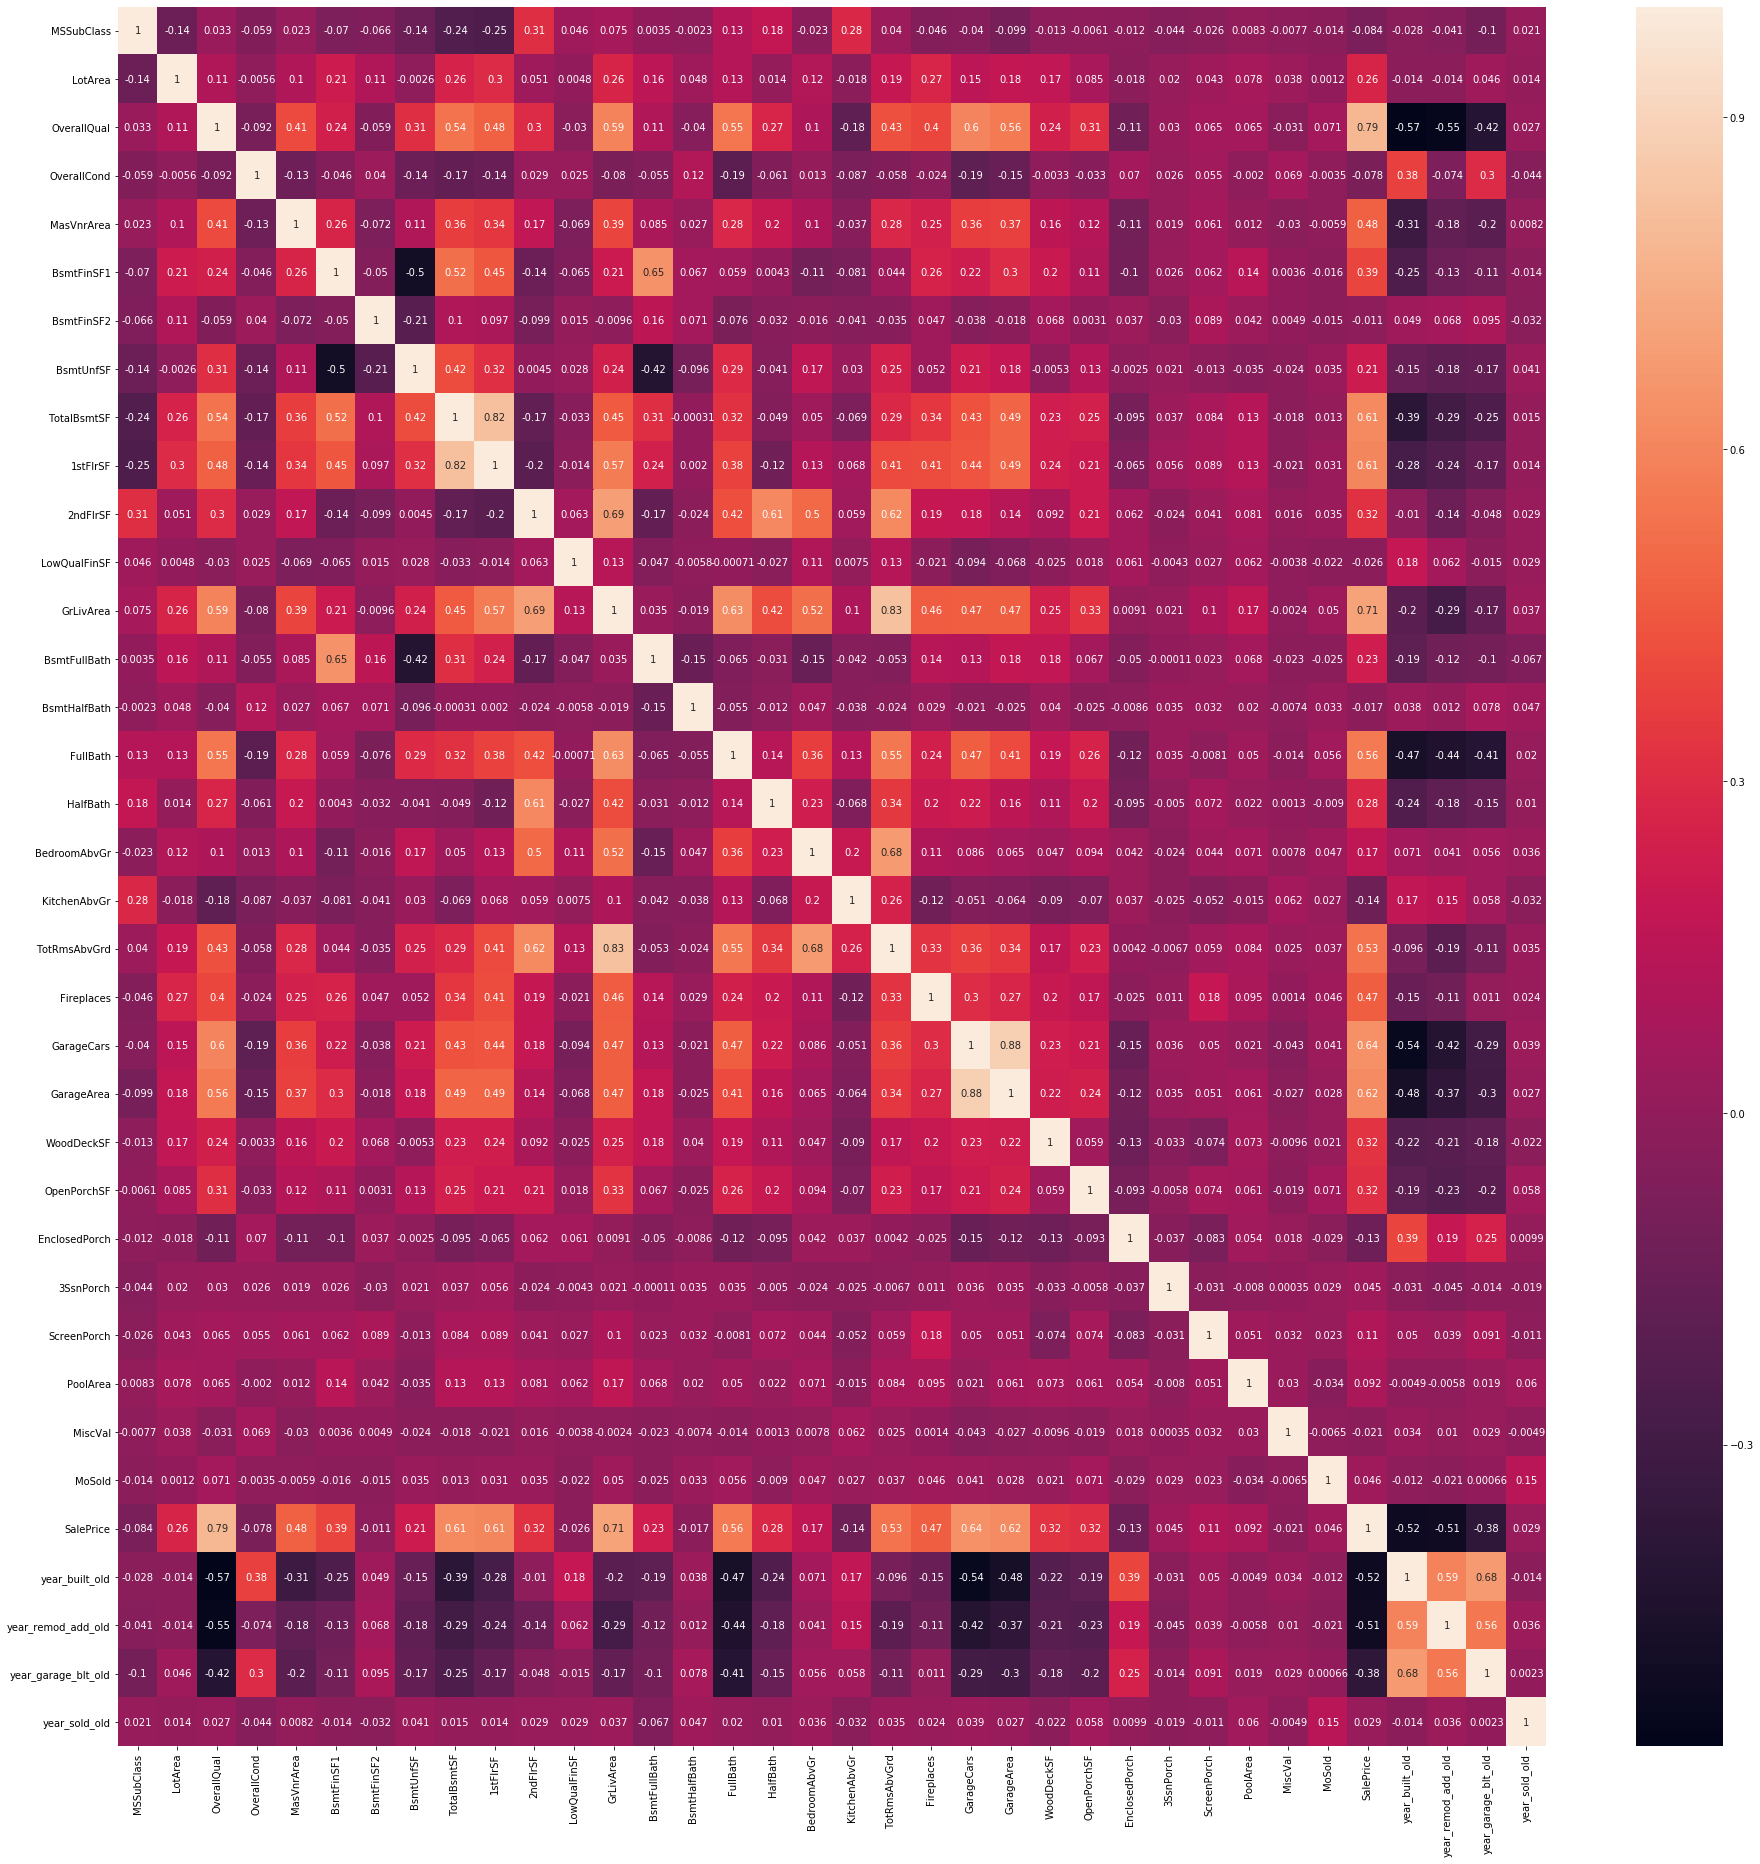

In [949]:
plt.figure(figsize=(32,32))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [950]:
df = df.drop(['GrLivArea','TotalBsmtSF'],axis = 1)

### c. Draw nomal distribution

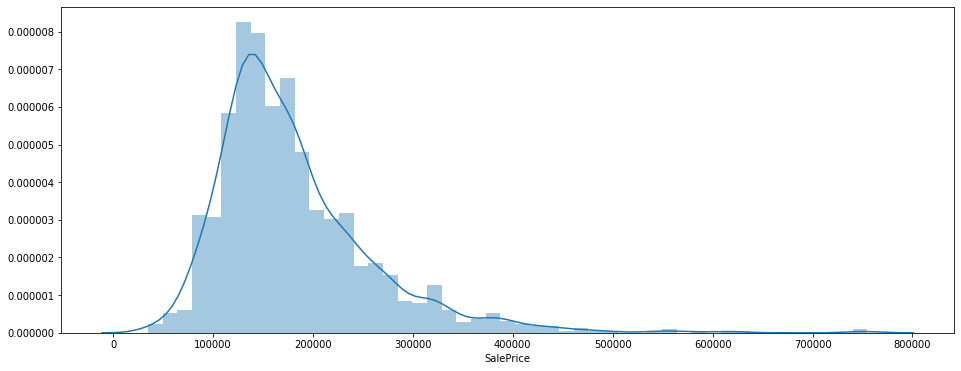

In [951]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

In [952]:
#Since the plot is not normally distributed thus we apply log 
df['SalePrice'] = df['SalePrice'].apply(lambda x : np.log(x))

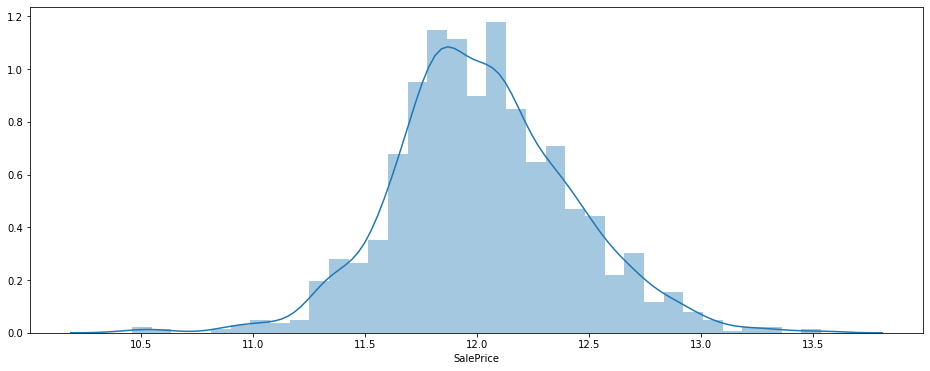

In [953]:
#check if sale price is converted or not
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

### d. Creating dummies for categorical columns

In [954]:
categorical_list.remove('SalePrice')

In [955]:
#check for ordinal variables
df[categorical_list].head()

,LotShape,Condition2,Exterior1st,MasVnrType,Neighborhood,SaleType,SaleCondition,GarageType,LandSlope,LotConfig,...,BsmtFinType2,BsmtQual,CentralAir,BldgType,Electrical,Exterior2nd,GarageCond,HeatingQC,Condition1,ExterQual
0,Reg,Norm,VinylSd,BrkFace,CollgCr,WD,Normal,Attchd,Gtl,Inside,...,Unf,Gd,Y,1Fam,SBrkr,VinylSd,TA,Ex,Norm,Gd
1,Reg,Norm,MetalSd,None,Veenker,WD,Normal,Attchd,Gtl,FR2,...,Unf,Gd,Y,1Fam,SBrkr,MetalSd,TA,Ex,Feedr,TA
2,IR1,Norm,VinylSd,BrkFace,CollgCr,WD,Normal,Attchd,Gtl,Inside,...,Unf,Gd,Y,1Fam,SBrkr,VinylSd,TA,Ex,Norm,Gd
3,IR1,Norm,Wd Sdng,None,Crawfor,WD,Abnorml,Detchd,Gtl,Corner,...,Unf,TA,Y,1Fam,SBrkr,Wd Shng,TA,Gd,Norm,TA
4,IR1,Norm,VinylSd,BrkFace,NoRidge,WD,Normal,Attchd,Gtl,FR2,...,Unf,Gd,Y,1Fam,SBrkr,VinylSd,TA,Ex,Norm,Gd


In [956]:
dummy_col = pd.get_dummies(df[categorical_list],drop_first=True)
df = pd.concat([df,dummy_col],axis='columns')

In [957]:
df.shape

(1460, 264)

In [958]:
#dropping columns not needed
df = df.drop(categorical_list,axis = 1)

In [959]:
df.shape

(1460, 228)

# Step 4 : Data Modelling
    a. Dividing the data to train and test
    b. Scaling all the numerical columns
    c. Feature elimination
    d. Building the model 
            a.a lasso
            a.b Ridge
    e.Defining the final model

### a. Dividing the data to train and test

In [960]:
#Dividing the dataframe into x and y
y=df.pop('SalePrice')
X=df

In [961]:
#Divinding the dataframe to test and train
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [962]:
numeric_list=['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','year_built_old','year_remod_add_old','year_garage_blt_old','year_sold_old']

### b. Scaling all the numerical columns 

In [963]:
scaler=StandardScaler()
X_train[numeric_list] = scaler.fit_transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

### c. Feature Elimination: It is done by Lasso itself

### d. Model Building

In [964]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [965]:
#check result of lasso regression
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084354,0.039022,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.907282,0.552921,0.864128,0.895193,...,0.809463,0.131150,3,0.936425,0.956313,0.944796,0.939031,0.941620,0.943637,0.006918
1,0.018746,0.006247,0.000000,0.000000,0.001,{'alpha': 0.001},0.894249,0.572334,0.887617,0.899587,...,0.816960,0.124720,1,0.899621,0.934957,0.899864,0.901870,0.906339,0.908530,0.013431
2,0.015622,0.000002,0.000000,0.000000,0.01,{'alpha': 0.01},0.873873,0.602819,0.860848,0.863917,...,0.811333,0.104375,2,0.848606,0.897823,0.844054,0.847137,0.853803,0.858285,0.020019
3,0.015621,0.000002,0.000000,0.000000,0.05,{'alpha': 0.05},0.791693,0.705046,0.752498,0.767942,...,0.760488,0.030898,4,0.765147,0.807448,0.763609,0.774828,0.772342,0.776675,0.015955
4,0.006249,0.007654,0.003125,0.006249,0.1,{'alpha': 0.1},0.672966,0.658590,0.624163,0.642640,...,0.650676,0.016408,5,0.647054,0.680218,0.646826,0.657043,0.661917,0.658611,0.012270
5,0.012497,0.006248,0.000000,0.000000,0.2,{'alpha': 0.2},0.396016,0.423790,0.353465,0.403576,...,0.396597,0.023398,6,0.388035,0.396745,0.373267,0.420256,0.424991,0.400659,0.019499
6,0.012497,0.006249,0.000000,0.000000,0.3,{'alpha': 0.3},0.056817,0.058024,0.009896,0.104458,...,0.069712,0.038867,7,0.064951,0.052586,0.024020,0.110183,0.128647,0.076077,0.038242
7,0.003124,0.006248,0.006248,0.007653,0.4,{'alpha': 0.4},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.006248,0.007653,0.003124,0.006249,0.5,{'alpha': 0.5},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.009373,0.007653,0.006248,0.007652,0.6,{'alpha': 0.6},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


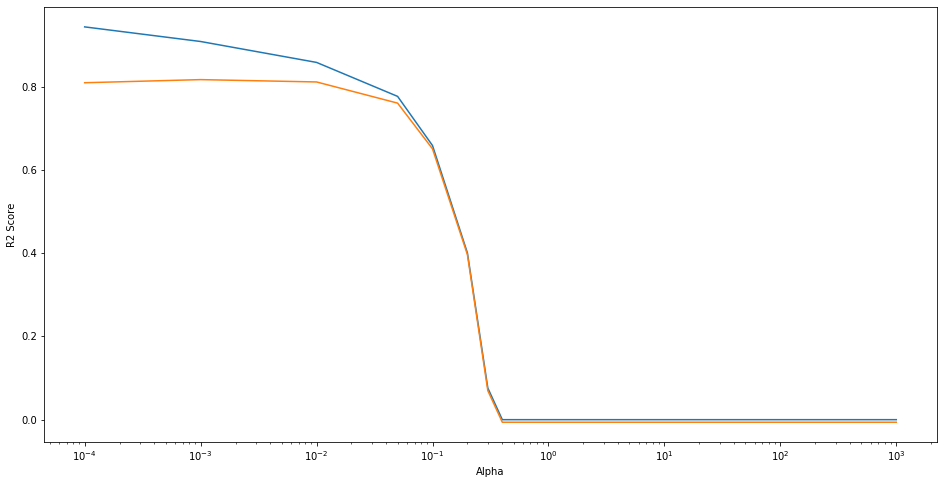

In [966]:
#graph for r2 score
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [967]:
#check for the best param
model_cv.best_params_

{'alpha': 0.001}

In [968]:
#building the model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9002778673669103
0.8925285799663344


In [969]:
#check for lasso coefficient
lasso.coef_

array([-0.02694508,  0.01649516,  0.09414392,  0.04101207, -0.00290923,
       -0.00219984,  0.        ,  0.00512661,  0.06061729,  0.07348719,
        0.00845212,  0.02999861,  0.00291624,  0.01811537,  0.01502251,
        0.00865359, -0.00668935,  0.02763464,  0.02707941,  0.05607402,
        0.00379319,  0.01555223, -0.00101507,  0.00983739,  0.0076597 ,
        0.01761653, -0.00958598, -0.00334363,  0.00351505, -0.05051749,
       -0.0247326 ,  0.00908142,  0.00239942,  0.        , -0.02997755,
       -0.        ,  0.        ,  0.        ,  0.        , -0.00251865,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.08513807, -0.        ,  0.        , -0.00066705,  0.        ,
        0.01268312,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.0187825 ,  0.02098785, -0.        ,
        0.08981466, -0.03783561, -0.00767431, -0.        , -0.  

In [970]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.889),
 ('MSSubClass', -0.027),
 ('LotArea', 0.016),
 ('OverallQual', 0.094),
 ('OverallCond', 0.041),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', -0.002),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.005),
 ('1stFlrSF', 0.061),
 ('2ndFlrSF', 0.073),
 ('LowQualFinSF', 0.008),
 ('BsmtFullBath', 0.03),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.018),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', -0.007),
 ('TotRmsAbvGrd', 0.028),
 ('Fireplaces', 0.027),
 ('GarageCars', 0.056),
 ('GarageArea', 0.004),
 ('WoodDeckSF', 0.016),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.018),
 ('PoolArea', -0.01),
 ('MiscVal', -0.003),
 ('MoSold', 0.004),
 ('year_built_old', -0.051),
 ('year_remod_add_old', -0.025),
 ('year_garage_blt_old', 0.009),
 ('year_sold_old', 0.002),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.03),
 ('LotShape_Reg', -0.0),
 ('Condition2_Feedr', 0.0),
 ('Condition2_Norm', 0.0),
 ('Condition2_PosA', 0.0),
 ('

In [971]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [972]:
lasso_coef['Coef']=lasso_coef['Coef'].apply(lambda x:abs(x))

In [973]:
#Extracting top 10 coefficient
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,11.888666
82,Neighborhood_StoneBr,0.105663
3,OverallQual,0.094144
66,Neighborhood_Crawfor,0.089815
46,Exterior1st_BrkFace,0.085138
76,Neighborhood_NridgHt,0.073867
10,2ndFlrSF,0.073487
9,1stFlrSF,0.060617
20,GarageCars,0.056074
218,Condition1_Norm,0.055886


### b.Ridge Regression 

In [974]:
#building up the model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9459769159253293
0.8077287974288502


In [975]:
#defining the model
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [976]:
#checking the result
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006249,0.007654,0.004686,0.007158,0.0001,{'alpha': 0.0001},0.836470,0.890498,0.380749,0.897206,...,0.946352,0.945270,0.949719,0.945208,0.950871,0.954384,0.950481,0.947755,0.948574,0.002706
1,0.010935,0.007159,0.000000,0.000000,0.0010,{'alpha': 0.001},0.837762,0.890402,0.396256,0.898095,...,0.946349,0.945264,0.949714,0.945208,0.950867,0.954380,0.950474,0.947749,0.948569,0.002705
2,0.010935,0.007159,0.001562,0.004686,0.0100,{'alpha': 0.01},0.847471,0.889256,0.520255,0.904670,...,0.946094,0.944851,0.949342,0.945183,0.950594,0.954016,0.949983,0.947360,0.948237,0.002662
3,0.006248,0.007653,0.001562,0.004687,0.0500,{'alpha': 0.05},0.863669,0.884493,0.753866,0.915221,...,0.943561,0.941491,0.946246,0.944962,0.948083,0.950806,0.946122,0.944173,0.945421,0.002457
4,0.015617,0.000017,0.004691,0.007166,0.1000,{'alpha': 0.1},0.870358,0.881065,0.836204,0.919659,...,0.940783,0.938381,0.943324,0.944690,0.945479,0.947680,0.942650,0.941246,0.942720,0.002540
5,0.017194,0.008418,0.003123,0.006246,0.2000,{'alpha': 0.2},0.877235,0.877840,0.879669,0.924733,...,0.937318,0.934806,0.939930,0.944185,0.942259,0.944104,0.938720,0.937988,0.939559,0.002907
6,0.018737,0.006238,0.006252,0.007658,0.3000,{'alpha': 0.3},0.881657,0.876336,0.891295,0.928335,...,0.935239,0.932686,0.937907,0.943698,0.940290,0.942066,0.936402,0.936159,0.937681,0.003191
7,0.015618,0.000008,0.000000,0.000000,0.4000,{'alpha': 0.4},0.884876,0.875493,0.895902,0.931129,...,0.933795,0.931185,0.936470,0.943225,0.938895,0.940683,0.934761,0.934924,0.936358,0.003394
8,0.012497,0.006249,0.000000,0.000000,0.5000,{'alpha': 0.5},0.887330,0.874981,0.898200,0.933360,...,0.932695,0.930015,0.935346,0.942772,0.937817,0.939648,0.933485,0.933999,0.935333,0.003544
9,0.009373,0.007653,0.001562,0.004686,0.6000,{'alpha': 0.6},0.889260,0.874661,0.899547,0.935177,...,0.931807,0.929050,0.934415,0.942339,0.936937,0.938823,0.932436,0.933257,0.934491,0.003661


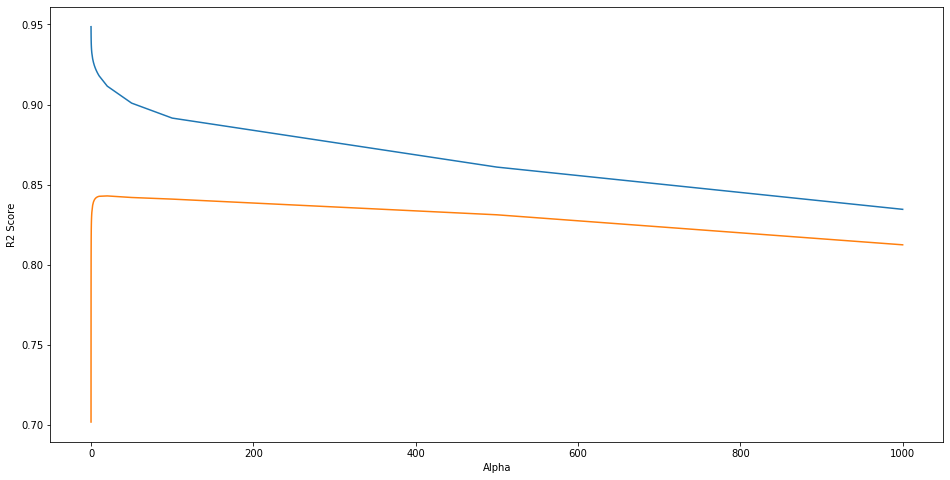

In [977]:
#plotting the graph
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('R2 Score')
plt.show()

In [978]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20}

In [979]:
#printing the r2score for train and test
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9099486231406656
0.8931876679183015


In [980]:
#checking the model parameters
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [981]:
ridge_coef['Coef']=ridge_coef['Coef'].apply(lambda x:abs(x))

In [982]:
#printing the coefficient
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,constant,11.828658
3,OverallQual,0.088181
10,2ndFlrSF,0.071676
66,Neighborhood_Crawfor,0.068714
82,Neighborhood_StoneBr,0.067974
46,Exterior1st_BrkFace,0.062299
9,1stFlrSF,0.056442
184,BsmtQual_TA,0.053385
76,Neighborhood_NridgHt,0.052755
67,Neighborhood_Edwards,0.052308


## Best Model

### From above ananlysis we can conclude that lasso is better

### Question 1: Building model with double alpha values for both ridge and lasso

### a.Lasso Regression

In [983]:
#building the model
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8871417472474111
0.8869383830378257


In [984]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.948),
 ('MSSubClass', -0.026),
 ('LotArea', 0.016),
 ('OverallQual', 0.108),
 ('OverallCond', 0.04),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.002),
 ('1stFlrSF', 0.066),
 ('2ndFlrSF', 0.065),
 ('LowQualFinSF', 0.007),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.016),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.004),
 ('KitchenAbvGr', -0.007),
 ('TotRmsAbvGrd', 0.028),
 ('Fireplaces', 0.029),
 ('GarageCars', 0.059),
 ('GarageArea', 0.005),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.011),
 ('MiscVal', -0.001),
 ('MoSold', 0.003),
 ('year_built_old', -0.047),
 ('year_remod_add_old', -0.023),
 ('year_garage_blt_old', 0.006),
 ('year_sold_old', 0.001),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('Condition2_Feedr', 0.0),
 ('Condition2_Norm', 0.0),
 ('Condition2_PosA', 0.0),
 ('Condit

In [985]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [986]:
#Extracting top 10 coefficient
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,11.948430
3,OverallQual,0.108336
9,1stFlrSF,0.066045
10,2ndFlrSF,0.064926
20,GarageCars,0.058749
66,Neighborhood_Crawfor,0.052435
218,Condition1_Norm,0.050851
46,Exterior1st_BrkFace,0.049525
122,Foundation_PConc,0.042089
4,OverallCond,0.040183


### b. Ridge Regression 

In [987]:
#printing the r2score for train and test
ridge = Ridge(alpha = 40)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9025332625133613
0.8922196370613771


In [988]:
#checking the model parameters
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [989]:
#printing the coefficient
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,constant,11.884115
3,OverallQual,0.090281
10,2ndFlrSF,0.060810
9,1stFlrSF,0.051216
66,Neighborhood_Crawfor,0.050410
20,GarageCars,0.047984
46,Exterior1st_BrkFace,0.046082
218,Condition1_Norm,0.044461
82,Neighborhood_StoneBr,0.043488
185,CentralAir_Y,0.041275


### Ques 3: Building model deleting 5 most important predictor variable

In [990]:
#most imp columns
col_list = ['Neighborhood_StoneBr','OverallQual','Neighborhood_Crawfor','Exterior1st_BrkFace','Neighborhood_NridgHt']
for i in col_list:
    X_train = X_train.drop(i,axis = 1)
    X_test = X_test.drop(i,axis = 1)

In [991]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [997]:
#check result of lasso regression
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071828,1.592495e-02,0.006248,0.007652,0.0001,{'alpha': 0.0001},0.896724,0.497227,0.842940,0.885037,...,0.785295,0.147631,1,0.932058,0.952432,0.940387,0.933467,0.936244,0.938918,0.007331
1,0.024995,1.249577e-02,0.003123,0.006247,0.001,{'alpha': 0.001},0.885882,0.494547,0.866345,0.864216,...,0.782331,0.146677,2,0.881802,0.926230,0.884886,0.886238,0.888974,0.893626,0.016465
2,0.015622,1.681823e-06,0.000000,0.000000,0.01,{'alpha': 0.01},0.849810,0.517006,0.841968,0.839915,...,0.774220,0.128849,3,0.821599,0.880978,0.818068,0.822212,0.828098,0.834191,0.023614
3,0.015621,9.879404e-03,0.000000,0.000000,0.05,{'alpha': 0.05},0.741964,0.613477,0.710810,0.724414,...,0.709439,0.050375,4,0.715968,0.782572,0.713066,0.726986,0.726489,0.733016,0.025391
4,0.015621,1.070497e-06,0.000000,0.000000,0.1,{'alpha': 0.1},0.611494,0.567543,0.555417,0.597681,...,0.593352,0.028799,5,0.593308,0.628033,0.580492,0.608001,0.607606,0.603488,0.015952
5,0.021874,7.649501e-03,0.003124,0.006248,0.2,{'alpha': 0.2},0.207179,0.215280,0.172167,0.217938,...,0.210581,0.022125,6,0.193887,0.218047,0.199340,0.236624,0.227730,0.215125,0.016309
6,0.021863,1.250286e-02,0.009380,0.007659,0.3,{'alpha': 0.3},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.024987,7.643643e-03,0.006255,0.007660,0.4,{'alpha': 0.4},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.021874,7.648508e-03,0.006255,0.007660,0.5,{'alpha': 0.5},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.024989,7.659484e-03,0.000000,0.000000,0.6,{'alpha': 0.6},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


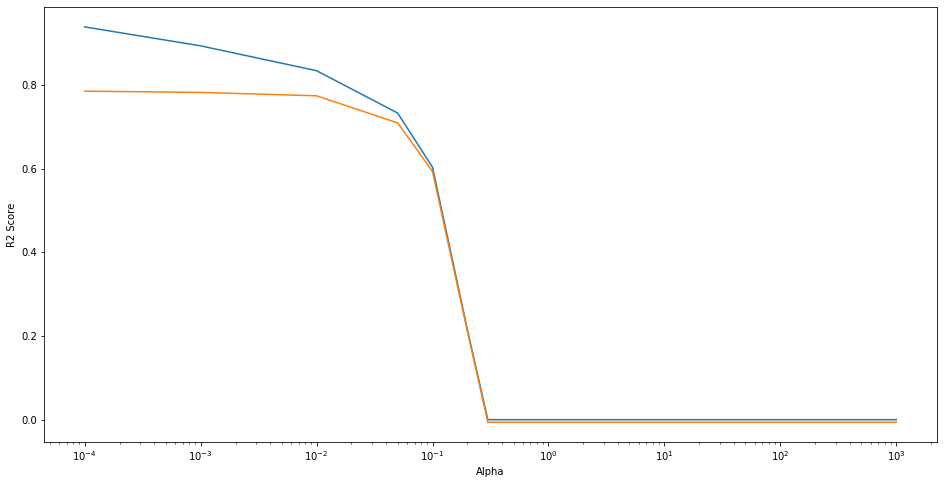

In [998]:
#graph for r2 score
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [999]:
#check for the best param
model_cv.best_params_

{'alpha': 0.0001}

In [1000]:
#building the model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.930930151500976
0.8713066550958476


In [1001]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.748),
 ('MSSubClass', -0.017),
 ('LotArea', 0.012),
 ('OverallQual', 0.044),
 ('OverallCond', 0.004),
 ('MasVnrArea', 0.023),
 ('BsmtFinSF1', 0.014),
 ('BsmtFinSF2', 0.021),
 ('BsmtUnfSF', 0.089),
 ('1stFlrSF', 0.106),
 ('2ndFlrSF', 0.018),
 ('LowQualFinSF', 0.02),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.017),
 ('FullBath', 0.014),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', -0.017),
 ('KitchenAbvGr', 0.015),
 ('TotRmsAbvGrd', 0.028),
 ('Fireplaces', 0.032),
 ('GarageCars', 0.022),
 ('GarageArea', 0.009),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.013),
 ('EnclosedPorch', 0.007),
 ('3SsnPorch', 0.013),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.007),
 ('MiscVal', 0.005),
 ('MoSold', -0.063),
 ('year_built_old', -0.021),
 ('year_remod_add_old', 0.018),
 ('year_garage_blt_old', 0.001),
 ('year_sold_old', 0.021),
 ('LotShape_IR2', -0.035),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.116),
 ('Condition2_Feedr', 0.051),
 ('Condition2_Norm', 0.0),
 ('Condition2_PosA', -0.591)

In [1002]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [1003]:
lasso_coef['Coef']=lasso_coef['Coef'].apply(lambda x:abs(x))

In [1004]:
#Extracting top 10 coefficient
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,const,10.747776
143,RoofMatl_WdShngl,1.286667
142,RoofMatl_WdShake,1.192176
137,RoofMatl_CompShg,1.166645
141,RoofMatl_Tar&Grv,1.101807
140,RoofMatl_Roll,1.082137
139,RoofMatl_Metal,1.053286
39,Condition2_PosN,0.590637
67,Neighborhood_MeadowV,0.324113
151,Heating_Grav,0.250664


### Thus we can conclude that variable change as well as the r2_score for modell reduces